Files already downloaded and verified
Files already downloaded and verified


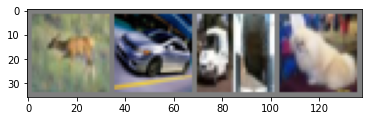

Epoch [1/15], Step [2000/12500], Loss: 2.3191
Epoch [1/15], Step [4000/12500], Loss: 2.3390
Epoch [1/15], Step [6000/12500], Loss: 2.2991
Epoch [1/15], Step [8000/12500], Loss: 2.2092
Epoch [1/15], Step [10000/12500], Loss: 2.2942
Epoch [1/15], Step [12000/12500], Loss: 1.6539
Epoch [2/15], Step [2000/12500], Loss: 2.7670
Epoch [2/15], Step [4000/12500], Loss: 2.1505
Epoch [2/15], Step [6000/12500], Loss: 1.8500
Epoch [2/15], Step [8000/12500], Loss: 1.6063
Epoch [2/15], Step [10000/12500], Loss: 2.1882
Epoch [2/15], Step [12000/12500], Loss: 1.6856
Epoch [3/15], Step [2000/12500], Loss: 1.6408
Epoch [3/15], Step [4000/12500], Loss: 1.6662
Epoch [3/15], Step [6000/12500], Loss: 1.5276
Epoch [3/15], Step [8000/12500], Loss: 0.9472
Epoch [3/15], Step [10000/12500], Loss: 1.4965
Epoch [3/15], Step [12000/12500], Loss: 1.0448
Epoch [4/15], Step [2000/12500], Loss: 1.7773
Epoch [4/15], Step [4000/12500], Loss: 1.3055
Epoch [4/15], Step [6000/12500], Loss: 1.3427
Epoch [4/15], Step [8000/125

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

no_epochs = 15
batch_size = 4
learning_rate = 0.001

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./CIFAR_data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./CIFAR_data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 16 * 5 * 5)           
        x = F.relu(self.fc1(x))              
        x = F.relu(self.fc2(x))
        x = self.fc3(x)                       
        return x


model = ConvNet().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

# Training
for epoch in range(no_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{no_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

# Testing
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')
      
    

Predicted: "plane", Actual: "cat"


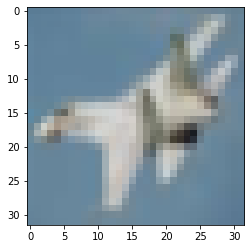

In [35]:

classes = [
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

model.eval()
x, y = test_dataset[10][0], test_dataset[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
    
    img = test_dataset[10][0] / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()